<a href="https://colab.research.google.com/github/JGMFC/DL_KC/blob/main/Pr%C3%A1ctica_DL_JG_v2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Importación Librerías

In [252]:
import cv2
import numpy as np
import numpy
import pandas
import pandas as pd
import imageio.v3 as io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, concatenate
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.regularizers import l2
import cv2
import imageio as io
from google.colab import drive
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from tqdm import tqdm
from typing import Optional, Union

## 1. Descarga y preprocesado de los datos

### 1.1 Descarga y formatting del CSV de los datos

In [253]:
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2024-03-03 13:01:13--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [         <=>        ]  52.85M  12.2MB/s    in 5.2s    

2024-03-03 13:01:19 (10.3 MB/s) - ‘airbnb-listings.csv’ saved [55414009]



In [254]:
from tqdm import tqdm
from typing import Optional, Union

In [255]:
data = pandas.read_csv("airbnb-listings.csv", sep = ';')
data = data.dropna(subset=['Price'])
data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17823671,https://www.airbnb.com/rooms/17823671,20170407214119,2017-04-08,Room in beautiful flat in Madrid centre!! SC8_1_2,Great room with large bed and two windows,Amazing 12 bedroom flat with 3 complete bathro...,Great room with large bed and two windows Amaz...,none,"The "" Barrio de las Letras "" is one of the mos...",...,NaN,NaN,NaN,NaN,NaN,strict,20,NaN,"40.41487093316894,-3.6965780975998435","Host Has Profile Pic,Host Identity Verified,Re..."
1,17309526,https://www.airbnb.com/rooms/17309526,20170407214050,2017-04-08,Double room in Gracia/Whole Apartment,Double room in Gracia - Habitación doble en Gr...,NaN,Double room in Gracia - Habitación doble en Gr...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"41.40132396962952,2.163712769014997","Host Has Profile Pic,Requires License"
2,801113,https://www.airbnb.com/rooms/801113,20170407214119,2017-04-08,DOUBLE ROOM WITH PRIVATE BATHROOM IN LA LATINA,Bright and spacious double room and bathroom f...,Spacious double room with private bathroom and...,Bright and spacious double room and bathroom f...,none,".Safety neighborhood with all the amenities, g...",...,9.0,10.0,9.0,NaN,NaN,moderate,1,3.15,"40.40860126037668,-3.7145957909729637","Host Has Profile Pic,Is Location Exact,Require..."
3,7357466,https://www.airbnb.com/rooms/7357466,20170407214119,2017-04-08,Alquiler habitación mes de agosto,"Hola, somos una familia de 5 amigos que vivímo...","La habitación que alquilamos es amplia, lumino...","Hola, somos una familia de 5 amigos que vivímo...",none,El piso es muy amplio y las zonas comunes dan ...,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43408638806261,-3.654979849617808","Host Has Profile Pic,Host Identity Verified,Re..."
4,17050866,https://www.airbnb.com/rooms/17050866,20170407214119,2017-04-08,Habitacion a solo 3 min de atocha,Nuestro Habitacion esta hubicada en centro de...,NaN,Nuestro Habitacion esta hubicada en centro de...,none,Es un barrio céntrico de madrid . Donde hay mu...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.71,"40.44181649452356,-3.6451428471469227","Host Has Profile Pic,Requires License"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,16231125,https://www.airbnb.com/rooms/16231125,20170407214119,2017-04-08,"Piso en en centro de Madrid,Quevedo","Piso de 3 habitaciones, un salón, un baño y un...",NaN,"Piso de 3 habitaciones, un salón, un baño y un...",none,Está muy bien comunicado y muy céntrico. Ademá...,...,NaN,NaN,NaN,NaN,NaN,moderate,1,NaN,"40.4348724447834,-3.707547039320753","Host Has Profile Pic,Requires License"
13997,4741021,https://www.airbnb.com/rooms/4741021,20170407214119,2017-04-08,"OLAVIDE IV, 3ºD, Friendly Rentals",The apartment is in a characteristic building ...,This lovely apartment is one of several we can...,The apartment is in a characteristic building ...,none,This very safe residential district is surroun...,...,8.0,NaN,NaN,NaN,NaN,strict,145,0.17,"40.43613375660163,-3.7027578557736502","Host Has Profile Pic,Is Location Exact,Require..."
13998,5803594,https://www.airbnb.com/rooms/5803594,20170407214119,2017-04-08,Habitación pequeña cómoda amena tranquila.,cocina para utilizar para comidas muy básicas ...,"HABITACIÓN privada pequeña pero cómoda,apartam...",cocina para utilizar para comidas muy básicas ...,none,Barrio de Madrid Ubicado cerca plaza de toros...,...,9.0,8.0,9.0,NaN,NaN,strict,1,2.10,"40.423445712695965,-3.645238780837596","Host Has Profile Pic,Requires License"
13999,16025541,https://www.airbnb.com/rooms/16025541,20170407214119,2017-04-08,New reformed apartment. Everything new!!!!,Outside vieuw without noise. Ideal for two per...,NaN,Outside vieuw without noise. Ideal for two per.

In [256]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

### 1.2. Descarga de imágenes

In [257]:
def download_images(paths: list,
                    canvas: tuple = (224, 224),
                    nb_channels: int = 3,
                    max_imgs: Optional[int] = None
                    ) -> tuple:
  """ Download a list of images from url adresses, converting them to a specific
  canvas size.

  Args:
    paths: Paths or url adresses from which to load images.
    canvas: Desired image width and height.
    nb_channels: Channels in images (1 for B/W, 3 for RGB).
    max_imgs: Upper threshold in the number of images to download.

  Return:
    a tuple of:
      - image values
      - indices within the paths that were successfull.

  """
  n_images = len(paths) if not max_imgs else max_imgs
  images = numpy.zeros((n_images, canvas[0], canvas[1], nb_channels),
                       dtype=numpy.uint8)
  downloaded_idxs = []

  for i_img, url in enumerate(tqdm(paths, total=n_images)):
    if i_img >= n_images:
      break
    try:
        img = io.imread(url)
        img = cv2.resize(img, (canvas[0], canvas[1]))
        downloaded_idxs.append(i_img)
        images[i_img] = img
    except (IOError, ValueError) as e:  # Unavailable url / conversion error
        pass
  return images[downloaded_idxs], downloaded_idxs

Normalización y conversión en el rango [0, 1]

In [258]:
images, idxs = download_images(data['Thumbnail Url'], max_imgs=3000)
images = images.astype("float32") / 255.
images.shape

  0%|          | 0/3000 [00:00<?, ?it/s]<ipython-input-257-4b4849c24d37>:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(url)
100%|██████████| 3000/3000 [27:55<00:00,  1.79it/s]


(1862, 224, 224, 3)

Filtrado acorde en los demás datos

In [259]:
filtered_data = data.iloc[idxs]
filtered_data

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17823671,https://www.airbnb.com/rooms/17823671,20170407214119,2017-04-08,Room in beautiful flat in Madrid centre!! SC8_1_2,Great room with large bed and two windows,Amazing 12 bedroom flat with 3 complete bathro...,Great room with large bed and two windows Amaz...,none,"The "" Barrio de las Letras "" is one of the mos...",...,NaN,NaN,NaN,NaN,NaN,strict,20,NaN,"40.41487093316894,-3.6965780975998435","Host Has Profile Pic,Host Identity Verified,Re..."
2,801113,https://www.airbnb.com/rooms/801113,20170407214119,2017-04-08,DOUBLE ROOM WITH PRIVATE BATHROOM IN LA LATINA,Bright and spacious double room and bathroom f...,Spacious double room with private bathroom and...,Bright and spacious double room and bathroom f...,none,".Safety neighborhood with all the amenities, g...",...,9.0,10.0,9.0,NaN,NaN,moderate,1,3.15,"40.40860126037668,-3.7145957909729637","Host Has Profile Pic,Is Location Exact,Require..."
3,7357466,https://www.airbnb.com/rooms/7357466,20170407214119,2017-04-08,Alquiler habitación mes de agosto,"Hola, somos una familia de 5 amigos que vivímo...","La habitación que alquilamos es amplia, lumino...","Hola, somos una familia de 5 amigos que vivímo...",none,El piso es muy amplio y las zonas comunes dan ...,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.43408638806261,-3.654979849617808","Host Has Profile Pic,Host Identity Verified,Re..."
4,17050866,https://www.airbnb.com/rooms/17050866,20170407214119,2017-04-08,Habitacion a solo 3 min de atocha,Nuestro Habitacion esta hubicada en centro de...,NaN,Nuestro Habitacion esta hubicada en centro de...,none,Es un barrio céntrico de madrid . Donde hay mu...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.71,"40.44181649452356,-3.6451428471469227","Host Has Profile Pic,Requires License"
5,6987048,https://www.airbnb.com/rooms/6987048,20170407214119,2017-04-08,3 bedroom apartment !!,Spacious apartment with three rooms that are r...,Apartment of 110 square meters. It comprises e...,Spacious apartment with three rooms that are r...,none,It is a quiet neighborhood all amenities : fre...,...,10.0,6.0,8.0,NaN,NaN,strict,1,0.05,"40.41147994191638,-3.6496248306429497","Host Has Profile Pic,Requires License"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,8548508,https://www.airbnb.com/rooms/8548508,20170407214119,2017-04-08,Great room in a great penthouse - 2,It is a penthouse with a spectacular terrace o...,NaN,It is a penthouse with a spectacular terrace o...,none,NaN,...,9.0,9.0,10.0,NaN,NaN,flexible,3,0.11,"40.48636404466029,-3.6498675392879125","Host Has Profile Pic,Is Location Exact,Require..."
2997,7813139,https://www.airbnb.com/rooms/7813139,20170407214119,2017-04-08,Lovely duplex in the heart of town,Quiet and cosy. Ideal for couples or families ...,"Nice appartment, a small nest looking over the...",Quiet and cosy. Ideal for couples or families ...,none,"Multitude of options for restaurants: mexican,...",...,9.0,10.0,9.0,NaN,NaN,strict,1,3.83,"40.41494296143138,-3.7082427849929656","Host Has Profile Pic,Host Identity Verified,Is..."
2998,7041758,https://www.airbnb.com/rooms/7041758,20170407214119,2017-04-08,Big room + office (internet 100mb),We are renting one large room in a shared flat...,NaN,We are renting one large room in a shared flat...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,1,0.05,"40.39514809314219,-3.6980818833873426","Host Has Profile Pic,Requires License"
2999,14391350,https://www.airbnb.com/rooms/14391350,20170407214119,2017-04-08,Bedroom near Atocha Train Station,Has everything you need. 5 minute walk to emaj...,The room is in a seperate wing of the apartmen...,Has everything you need. 5 minute walk to emaj...,none,"Cultural, fri

### 1.3 Guardado de los datos para posterior uso/selección

In [260]:
numpy.save('images.npy', images)
filtered_data.to_csv('filtered_data.csv', sep=';', index=False)

In [261]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
!cp images.npy /content/drive/MyDrive/images_final.npy
!cp filtered_data.csv /content/drive/MyDrive/filtered_data.csv

!ls -lah images* filtered*  # Comprobación

-rw-r--r-- 1 root root 7.2M Mar  3 13:29 filtered_data.csv
-rw-r--r-- 1 root root 1.1G Mar  3 13:29 images.npy


In [263]:
# Comprobamos a abrirlos de nuevo
saved_data = pandas.read_csv("/content/drive/MyDrive/filtered_data.csv", sep=';')
saved_imgs = numpy.load("/content/drive/MyDrive/images_final.npy")
saved_data.shape, saved_imgs.shape

((1862, 89), (1862, 224, 224, 3))

Así, por ejemplo, cargamos y visualizamos la distribución de las etiquetas:

<Axes: >

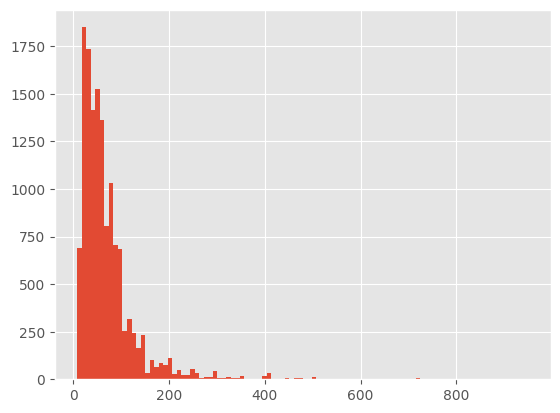

In [264]:
data['Price'].hist(bins=100)

Y podemos dividir por porcentajes, para crear clases, como por ejemplo:

In [265]:
data['Price'].describe()

count    13990.000000
mean        71.515154
std         67.863596
min          9.000000
25%         32.000000
50%         55.000000
75%         85.000000
max        950.000000
Name: Price, dtype: float64

<Axes: >

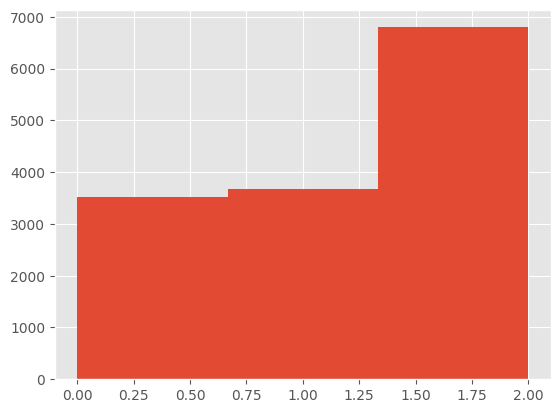

In [266]:
y_class = []
for y in data['Price']:
  if y <= 32:
    y_class.append(0) # Rango más barato
  elif 32 < y <= 55:
    y_class.append(1) # Rango intermedio
  else:
    y_class.append(2)
y_class = pandas.Series(y_class)
y_class.hist(bins=3)

Al dividir entre train y test, mantener la coherencia con las imagenes
Funcion de perdidas no puede tener not a number

## 3. División entre train y test

Dividimos los datos entre train test y validación. en proporción 80-20 y a su vez 50-50

In [267]:
from sklearn.model_selection import train_test_split

train, test   = train_test_split(saved_data, test_size=0.2, shuffle=True, random_state=1234)
test, valid   = train_test_split(test, test_size=0.5, shuffle=True, random_state=1234)

print(f'Shape 1D train: {train.shape}')
print(f'Shape 1D valid: {valid.shape}')
print(f'Shape 1D test:  {test.shape}')

Shape 1D train: (1489, 89)
Shape 1D valid: (187, 89)
Shape 1D test:  (186, 89)


Declaramos los indices para asegurar la coherencia entre train-valid-test de 1D e imagenes

In [268]:
train_index , valid_index , test_index = train.index , valid.index , test.index

Para facilitar su recuperación y dado el tamaño guardardamos por separado y nos aseguramos que mantengan las dimensiones anteriores

In [269]:
saved_data.loc[train_index].to_csv('/content/drive/MyDrive/train_1D.csv', sep=';', decimal='.', index=False)
saved_data.loc[valid_index].to_csv('/content/drive/MyDrive/valid_1D.csv', sep=';', decimal='.', index=False)
saved_data.loc[test_index].to_csv('/content/drive/MyDrive/test_1D.csv', sep=';', decimal='.', index=False)

print(f'Shape 1D train CSV: {saved_data.loc[train_index].shape}')
print(f'Shape 1D valid CSV: {saved_data.loc[valid_index].shape}')
print(f'Shape 1D test CSV:  {saved_data.loc[test_index].shape}')

Shape 1D train CSV: (1489, 89)
Shape 1D valid CSV: (187, 89)
Shape 1D test CSV:  (186, 89)


Separamos en base a los indices anteriores las imagenes

In [270]:
np.save('/content/drive/MyDrive/train_images.npy',saved_imgs[train_index])
np.save('/content/drive/MyDrive/valid_images.npy',saved_imgs[valid_index])
np.save('/content/drive/MyDrive/test_images.npy',saved_imgs[test_index])


print(f'Shape images train CSV: {saved_imgs[train_index].shape}')
print(f'Shape images valid CSV: {saved_imgs[valid_index].shape}')
print(f'Shape images test CSV:  {saved_imgs[test_index].shape}')

Shape images train CSV: (1489, 224, 224, 3)
Shape images valid CSV: (187, 224, 224, 3)
Shape images test CSV:  (186, 224, 224, 3)


## 4. Análisis de los datos (Partes extraídas de la práctica de ML)

In [271]:
# Montamos (al ejecutarse en distintos dias el Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
## Cargamos el dataset de train

df = pd.read_csv('/content/drive/MyDrive/train_1D.csv', sep=';', decimal='.')

In [273]:
# Hacemos un drop de todas las columnas que OBVIAMENTE no aportan información relevante
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url',
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name',
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price',
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review',
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count']

df.drop(not_useful_columns, axis=1, inplace=True)

Hay una serie de columnas que, si bien aportan mucha información, exigen un tratamiento previo que queda fuera del alcance de este trabajo. Name, summary, description... exigirían tokenización y un análisis con NLP para poder sacar algo en claro, de modo que se eliminan.

In [274]:
# Hacemos un drop de todas las columnas que aportando información quedan fuera del scope
NLP_columns = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About']

df.drop(NLP_columns, axis=1, inplace=True)

Analizamos los valores

In [275]:
df.apply(lambda x: len(x.unique()))

Experiences Offered                1
Host Since                       916
Host Response Time                 5
Host Response Rate                43
Host Acceptance Rate               1
Host Verifications                95
Street                           333
Neighbourhood                     80
Neighbourhood Cleansed           143
Neighbourhood Group Cleansed      28
City                              26
State                             15
Zipcode                           91
Market                             5
Smart Location                    26
Country Code                       1
Country                            1
Latitude                        1489
Longitude                       1489
Property Type                     13
Room Type                          3
Accommodates                      13
Bathrooms                         14
Bedrooms                           8
Beds                              13
Bed Type                           5
Amenities                       1427
S

La variable Street no muestra realmente la calle; en muchas, simplemente es la ciudad y un código postal (variables que ya tienen su propia columna). Es una variable muy ruidosa y no categorizada.

Por otro lado, State, Market y Smart Location aportan la misma información, al igual que Country y Country Code y de forma similar a Neighbourhood y Zipcode.

In [276]:
df.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)

In [277]:
unique_values = df['City'].value_counts()
print(unique_values)

Madrid                             1418
Barcelona                            32
Palma                                 6
马德里                                   6
Madrid, Comunidad de Madrid, ES       3
Palma de Mallorca                     2
Motilla del Palancar                  2
Can Pastilla                          1
Alcúdia                               1
Illes Balears                         1
Algaida                               1
Illetes                               1
Ventas                                1
Cala Ratjada                          1
Madri                                 1
Valldemossa                           1
Pollença                              1
Rotes Velles                          1
Llucmajor                             1
Binissalem                            1
MADRID                                1
Sineu                                 1
Calvià                                1
madrid                                1
Felanitx                              1


Vemos que mayoritariamente está Madrid, por lo que vamos a filtrar por esta columna y luego eliminarla. Esto Restringe nuestro análisis/Modelo a la ciudad de Madrid

In [278]:
    df = df[df['City'] == 'Madrid']
    df.drop(['City'], axis=1, inplace=True)

<ipython-input-278-89d84624a772>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['City'], axis=1, inplace=True)


In [279]:
df.head()

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Verifications,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Country Code,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Features
0,none,2016-04-26,within an hour,100.0,NaN,"email,phone,reviews,work_email",Sol,Sol,Centro,ES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,"Host Has Profile Pic,Is Location Exact,Require..."
1,none,2016-03-30,NaN,NaN,NaN,"email,phone,facebook,jumio,government_id,work_...",NaN,Embajadores,Centro,ES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Re..."
2,none,2015-06-11,within an hour,92.0,NaN,"email,phone,reviews,jumio,offline_government_i...",NaN,Arapiles,Chamberí,ES,...,9.0,8.0,9.0,9.0,9.0,8.0,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Re..."
3,none,2014-01-01,within an hour,100.0,NaN,"email,phone,reviews,jumio,work_email",Sol,Palacio,Centro,ES,...,10.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
4,none,2014-01-16,NaN,NaN,NaN,"email,phone,reviews,jumio",La Latina,Palacio,Centro,ES,...,9.0,10.0,10.0,10.0,10.0,9.0,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is..."


Por último se comprueba qué variables tienen muchos valores missing (NaN or null). Hay columnas en las que apenas hay datos

In [280]:
print(f'El dataframe tiene un total de {len(df)} filas.')
len(df) - df.count() # vemos cuántos valores NaN hay por columna

El dataframe tiene un total de 1418 filas.


Experiences Offered                0
Host Since                         0
Host Response Time               198
Host Response Rate               198
Host Acceptance Rate            1418
Host Verifications                 0
Neighbourhood                    500
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed       0
Country Code                       0
Latitude                           0
Longitude                          0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                          5
Bedrooms                           7
Beds                               5
Bed Type                           0
Amenities                          8
Square Feet                     1362
Price                              0
Security Deposit                 822
Cleaning Fee                     578
Guests Included                    0
Extra People                       0
Minimum Nights                     0
M

In [281]:
NaN_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]
df.drop(NaN_values, axis=1, inplace=True)

<ipython-input-281-91a79a6a943e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(NaN_values, axis=1, inplace=True)


Analizamos su hay variables redundantes

<ipython-input-282-8d6d43de3fe5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(df.drop(['Price'], axis=1).corr())


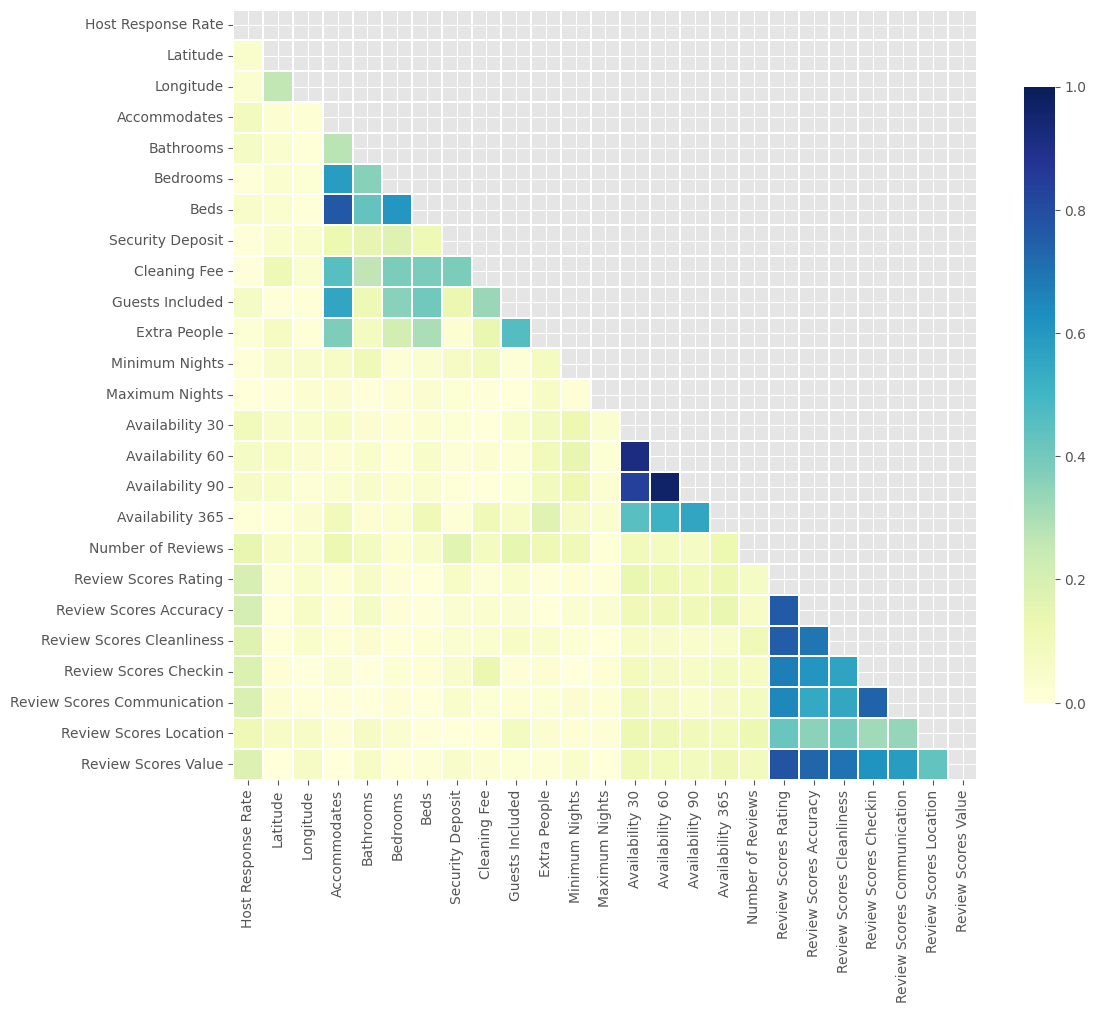

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Genera una máscara para la parte inferior de la matriz
mask = np.triu(corr)

# Configura la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=0.1, cmap="YlGnBu", cbar_kws={"shrink": 0.8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

Vemos que hay mucha correlación entre las variables de availability y las de reviews. Podemos eliminar todas las availability salvo 365 y hacer una media de las de review; he decidido hacer media porque son reviews. Eliminamos también Accommodates que tiene correlación alta con Beds.

In [283]:
reviews = df.loc[: , "Review Scores Rating":"Review Scores Value"]
df['Average Review'] = reviews.mean(axis=1)

df.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating',
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)

<ipython-input-284-458d050a02e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(df.drop(['Price'], axis=1).corr())


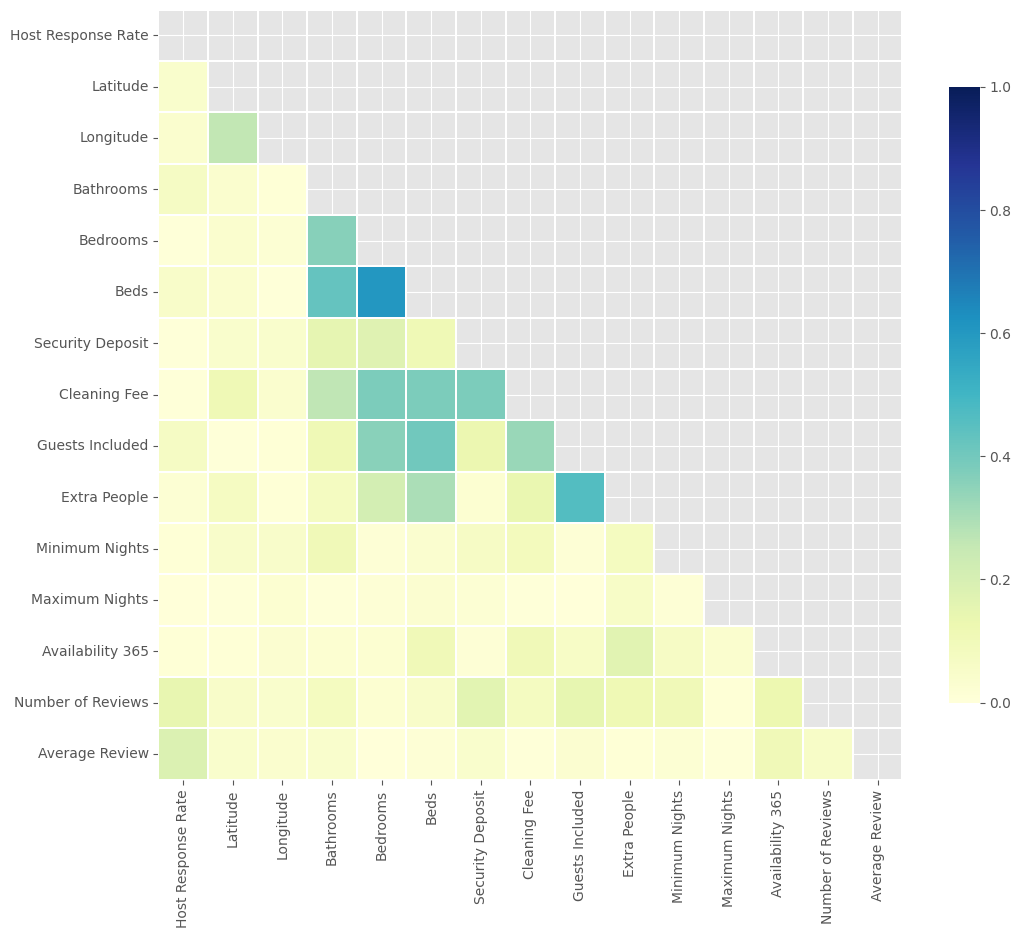

In [284]:
# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Genera una máscara para la parte inferior de la matriz
mask = np.triu(corr)

# Configura la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            linewidths=0.1, cmap="YlGnBu", cbar_kws={"shrink": 0.8})

plt.show()

In [285]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,1220.0,95.910656,13.090687,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,1418.0,40.420620,0.021312,40.340953,40.409652,40.418146,40.428800,40.507500
Longitude,1418.0,-3.696849,0.024876,-3.784862,-3.708740,-3.701850,-3.693171,-3.575571
Bathrooms,1413.0,1.255131,0.633840,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,1411.0,1.254429,0.754025,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,1413.0,1.914367,1.510267,1.000000,1.000000,1.000000,2.000000,16.000000
Price,1418.0,59.540903,45.669026,10.000000,30.000000,50.000000,75.000000,595.000000
Security Deposit,596.0,175.535235,99.705400,70.000000,100.000000,150.000000,200.000000,900.000000
Cleaning Fee,840.0,26.647619,18.143373,5.000000,15.000000,25.000000,30.000000,140.000000
Guests Included,1418.0,1.524683,0.973044,1.000000,1.000000,1.000000,2.000000,10.000000


In [286]:
df_n = df[['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']]
df_n.head(20)

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed
0,Sol,Sol,Centro
1,NaN,Embajadores,Centro
2,NaN,Arapiles,Chamberí
3,Sol,Palacio,Centro
4,La Latina,Palacio,Centro
5,NaN,Embajadores,Centro
6,Adelfas,Adelfas,Retiro
7,Bellas Vistas,Bellas Vistas,Tetuán
8,Sol,Sol,Centro
9,NaN,Castellana,Salamanca


In [287]:
print(f'El dataframe tiene un total de {len(df_n)} filas.')
len(df_n) - df_n.count() # vemos cuántos valores NaN hay por columna

El dataframe tiene un total de 1418 filas.


Neighbourhood                   500
Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
dtype: int64

In [288]:
df_n.apply(lambda x: len(x.unique())) # vemos el número de valores distintos por columna

Neighbourhood                    64
Neighbourhood Cleansed          115
Neighbourhood Group Cleansed     21
dtype: int64

Debido a que Neighbourhood Cleansed no tiene nulos pero tiene muchos valores distintos se va a usar Neighbourhood Group Cleansed a no ser que sea NaN/Null; en ese caso se rellenará con Neighbourhood Cleansed

In [289]:
df_n["Final Neighbourhood"] = df_n["Neighbourhood Group Cleansed"].fillna(df_n["Neighbourhood Cleansed"])

<ipython-input-289-a5cfe22ec8de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n["Final Neighbourhood"] = df_n["Neighbourhood Group Cleansed"].fillna(df_n["Neighbourhood Cleansed"])


In [290]:
df["Final Neighbourhood"] = df["Neighbourhood Group Cleansed"].fillna(df["Neighbourhood Cleansed"])
df.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

Host Verifications, Features y Amenities exigirían un análisis NLP, pero hay información directa que se puede extraer. Todas son listas, separadas por comas. Se puede contar el número de elementos en cada lista y usarlo como característica.

In [291]:
df_l = df[['Features', 'Amenities', 'Host Verifications']]
df_l.fillna("", inplace=True) # rellenamos los huecos con cadenas vacías

df_l['Features'] = df_l['Features'].apply(lambda x: len(str(x).split(',')))
df_l['Amenities'] = df_l['Amenities'].apply(lambda x: len(str(x).split(',')))
df_l['Host Verifications'] = df_l['Host Verifications'].apply(lambda x: len(str(x).split(',')))

df_l.head(10)

<ipython-input-291-cbd94da3886a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l.fillna("", inplace=True) # rellenamos los huecos con cadenas vacías
<ipython-input-291-cbd94da3886a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['Features'] = df_l['Features'].apply(lambda x: len(str(x).split(',')))
<ipython-input-291-cbd94da3886a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Features,Amenities,Host Verifications
0,4,17,4
1,4,9,6
2,3,15,6
3,4,13,5
4,4,11,4
5,3,17,3
6,5,9,6
7,4,15,4
8,4,19,4
9,3,19,3


In [292]:
df['Features'].fillna("", inplace=True)
df['Amenities'].fillna("", inplace=True)
df['Host Verifications'].fillna("", inplace=True)

df['Features'] = df['Features'].apply(lambda x: len(str(x).split(',')))
df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))
df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')))

In [293]:
df.columns

Index(['Experiences Offered', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Host Verifications', 'Country Code', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 365', 'Number of Reviews',
       'Cancellation Policy', 'Features', 'Average Review',
       'Final Neighbourhood'],
      dtype='object')

In [294]:
from datetime import datetime

df.dropna(subset=['Host Since'], inplace=True) # se ha visto antes que solo hay tres valores missing, no se pierde mucho

df['Host Since'] = df['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df['Years Being Host'] = df['Host Since'].apply(lambda x: 2017 - x.year)

df.drop(['Host Since'], axis=1, inplace=True)

Categorización de Variables: Vemos el tipo de las columnas restantes. Las numéricas se convierten a float, y se va a hacer una limpieza general: cero baños, precio cero... esas cosas pueden y deben limpiarse al recoger los datos.

In [295]:
print(f"Registros con cero baños: {len(df[df['Bathrooms'] == 0])}")
print(f"Registros con precio cero: {len(df[df['Price'] == 0])}")

df = df[df['Bathrooms'] != 0]
df = df[df['Price'] != 0]

Registros con cero baños: 9
Registros con precio cero: 0


In [296]:
list(df.select_dtypes(include=['object']).columns)

['Experiences Offered',
 'Host Response Time',
 'Country Code',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood']

In [297]:
df_nn = df[list(df.select_dtypes(include=['object']).columns)]
df_nn.apply(lambda x: len(x.unique())) # valores diferentes

Experiences Offered     1
Host Response Time      5
Country Code            1
Property Type          13
Room Type               3
Bed Type                5
Cancellation Policy     3
Final Neighbourhood    21
dtype: int64

In [298]:
len(df_nn) - df_nn.count() # solo market y host response time tienen missing values

Experiences Offered      0
Host Response Time     193
Country Code             0
Property Type            0
Room Type                0
Bed Type                 0
Cancellation Policy      0
Final Neighbourhood      0
dtype: int64

In [299]:
df_nn["Host Response Time"].value_counts()

within an hour        791
within a few hours    263
within a day          142
a few days or more     20
Name: Host Response Time, dtype: int64

In [300]:
df["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)

In [301]:
df["Experiences Offered"].value_counts()

none    1409
Name: Experiences Offered, dtype: int64

In [302]:
df.drop(['Experiences Offered'], axis=1, inplace=True)

In [303]:
df.drop(['Country Code'], axis=1, inplace=True)

In [304]:
categorical = ['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy',
 'Final Neighbourhood'
]

# Creamos un dict para usarlo después en test
mean_map = {}
for c in categorical:
    mean = df.groupby(c)['Price'].mean()
    df[c] = df[c].map(mean)
    mean_map[c] = mean

In [305]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df = df[cols]

df.fillna(df.mean(), inplace=True)
df.isnull().any()

Price                  False
Host Response Time     False
Host Response Rate     False
Host Verifications     False
Latitude               False
Longitude              False
Property Type          False
Room Type              False
Bathrooms              False
Bedrooms               False
Beds                   False
Bed Type               False
Amenities              False
Security Deposit       False
Cleaning Fee           False
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Availability 365       False
Number of Reviews      False
Cancellation Policy    False
Features               False
Average Review         False
Final Neighbourhood    False
Years Being Host       False
dtype: bool

La longitud y longitud nos indican la geolocalización de los apartamentos. Como en el procesado nos hemos quedado con las ubicaciones de madrid, calcularemos la distancia que hay desde el centro de Madrid hasta el apartamento.

In [306]:
def haversine_distance(lat1, lon1, lat2, lon2):
	""" Calculo distancia haversine entre dos localizaciones

    Parámetros:
	lat1 -- latitud posición 1
	lon1 -- longitud posicion 1
	lat2 -- latitud posición 2
	lon2 -- longitud posición 2

    Returns:
	Distancia (en m) entre dos puntos
	"""
	lon1 = np.radians(lon1)
	lat1 = np.radians(lat1)
	lon2 = np.radians(lon2)
	lat2 = np.radians(lat2)

	r = 6371

	dlon = np.subtract(lon2, lon1)
	dlat = np.subtract(lat2, lat1)

	a = np.add(np.power(np.sin(np.divide(dlat, 2)), 2),
               np.multiply(np.cos(lat1),
                           np.multiply(np.cos(lat2),
                                       np.power(np.sin(np.divide(dlon, 2)), 2))
                           )
              )
	c = np.multiply(2, np.arcsin(np.sqrt(a)))

	return c*r*1000

## 5. Preprocesado de los datos (en base al anterior apartado)

In [307]:
def elimina_columnas(df,columnas):
	""" Elimina columna(s) de dataframe

	Parámetros:
	df -- dataframe a procesar
    columnas -- columna(s) a eliminar

	Returns:
	df - dataframe procesado por lo criterios optados en el procesamiento
	"""
	df = df.drop(columnas, axis=1)
	return df

def prepoc_df(df,imagenes):
	""" Procesamiento del dataframe con la ingeniería de características hecha en el procesamiento

	Parámetros:
	df - dataframe a procesar

	Returns:
	df - dataframe procesado por lo criterios optados en el procesamiento
	images - imagenes asociadas al dataframe
	"""


	#Longitud y Latitud centro madrid para calcular la distancia haversine
	centro_madrid_lat = 40.41831
	centro_madrid_lon = -3.70275


	not_useful_columns = [
			'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url',
			'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name',
			'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price',
			'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review',
			'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
			'Host Listings Count', 'Host Total Listings Count'
	]

	somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
				'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
				'Host Location', 'Host About']


	not_useful_columns_2 = ['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode']

	columns_with_too_many_missing_values = [
			'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
	]

  #Quitamos las columnas con su mayoría de variables a nulos
	df = elimina_columnas(df,not_useful_columns)
  #Quitamos aquellas variables que no aprotan valor a la solución del problema
	df = elimina_columnas(df,somehow_useful_columns_but_droppable_anyway)
   #Quitamos las columnas con su mayoría de variables a nulos
	df = elimina_columnas(df,not_useful_columns_2)
  #Quitamos aquellas variables que no aprotan valor a la solución del problema
	df = elimina_columnas(df,columns_with_too_many_missing_values)
  #Price entre 20 y 120 €
	df = df [(df['Price']>20) & (df['Price']<150)]
  #Nos quedamos solo con los apartamentos
	df  = df[df['Property Type']=="Apartment"]
	df = elimina_columnas(df,['Property Type'])
	#Nos quedamos con aquellos pisos que se encuentran en Madrid
	df = df[df['City'].str.contains("Mad",na=False, case=False)]
  #Room type diferente a shared
	df = df [df['Room Type'] !="Shared room"]
  #Bed type igual a Real bed
	df = df [df['Bed Type'] =="Real Bed"]
	df = elimina_columnas(df,['Bed Type'])
	#Quitamos entradas con 0 baños
	df = df[df['Bathrooms'] != 0]
  #Aplicamos distancia harvesine para saber a qué distancia del centro están
	df = df .assign(centro =  lambda x: haversine_distance(x['Latitude'],x['Longitude'],centro_madrid_lat,centro_madrid_lon))
  #Eliminamos columnas las cuales hemos generado nuevas variables relacionado con la localización
	df = elimina_columnas(df,['City','Longitude','Latitude',"Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"])


	#medias reviews
	reviews = df.loc[: , "Review Scores Rating":"Review Scores Value"]
	df['Average Review'] = reviews.mean(axis=1)

	df.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating',
				   'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
					 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
					 'Accommodates'], axis=1, inplace=True)


	#Features , Amenities , Host verifications conteo
	df['Features'].fillna("", inplace=True)
	df['Amenities'].fillna("", inplace=True)
	df['Host Verifications'].fillna("", inplace=True)

	df['Features'] = df['Features'].apply(lambda x: len(str(x).split(',')))
	df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))
	df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')))


	#años de inquilino
	from datetime import datetime
	df.dropna(subset=['Host Since'], inplace=True)
	df['Host Since'] = df['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
	df['Years Being Host'] = df['Host Since'].apply(lambda x: 2017 - x.year)
	df.drop(['Host Since'], axis=1, inplace=True)


	df["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)
	df.drop(['Experiences Offered'], axis=1, inplace=True)
	df.drop(['Country Code'], axis=1, inplace=True)


	# Variable categóricas a numéricas
	df['Host Response Time']  = df['Host Response Time'].astype(dummies_type_Host_Response_Time)
	df['Room Type'] 				  = df['Room Type'].astype(dummies_type_Room_Type)
	df['Cancellation Policy'] = df['Cancellation Policy'].astype(dummies_type_Cancellation_Policy)
	Host_Response_Time  = pd.get_dummies(df[['Host Response Time']], prefix='Host_Response_Time')
	Room_Type           = pd.get_dummies(df[['Room Type']], prefix='Room_Type')
	Cancellation_Policy = pd.get_dummies(df[['Cancellation Policy']], prefix='Cancellation_Policy')

	categorical_data = pd.concat([Host_Response_Time,Room_Type,Cancellation_Policy], axis=1, join='inner')
	df = pd.concat([df,categorical_data], axis=1)

	df = elimina_columnas(df,['Host Response Time','Room Type','Cancellation Policy'])



	# Rellenamos valores nulos sobrantes con la media
	df.fillna(df.mean(), inplace=True)


	#Nos quedamos con las imagenes de los registros válidos
	indices = df.index
	imagenes = imagenes[indices]

	return df , imagenes


In [308]:
# Montamos (al ejecutarse en distintos dias el Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
#Cargamos TRain
data_train   = pd.read_csv("/content/drive/MyDrive/train_1D.csv", sep=';')
images_train = np.load("/content/drive/MyDrive/train_images.npy")

#Cargamos Valid
data_valid  = pd.read_csv("/content/drive/MyDrive/valid_1D.csv", sep=';', decimal='.')
images_valid = np.load("/content/drive/MyDrive/valid_images.npy")


#Cargamos TEst
data_test   = pd.read_csv('/content/drive/MyDrive/test_1D.csv', sep=';', decimal='.')
images_test = np.load("/content/drive/MyDrive/test_images.npy")

In [310]:
df_train_transform, images_train = transform(data_train,images_train)
df_valid_transform, images_valid = transform(data_valid,images_valid)
df_test_transform, images_test   = transform(data_test,images_test)

<ipython-input-103-57b2f8187572>:96: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
<ipython-input-103-57b2f8187572>:96: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
<ipython-input-103-57b2f8187572>:96: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence t

In [311]:
print(f"Dimensiones del dataset de train antes del preprocesamiento: {data_train.shape}")
print(f"Dimensiones del dataset de valid antes del preprocesamiento: {data_valid.shape}")
print(f"Dimensiones del dataset de test antes del preprocesamiento: {data_test.shape}")


print(f"Dimensiones del dataset de train después del preprocesamiento: {df_train_transform.shape}")
print(f"Dimensiones del dataset de valid después del preprocesamiento: {df_valid_transform.shape}")
print(f"Dimensiones del dataset de test después del preprocesamiento: {df_test_transform.shape}")

Dimensiones del dataset de train antes del preprocesamiento: (1489, 89)
Dimensiones del dataset de valid antes del preprocesamiento: (187, 89)
Dimensiones del dataset de test antes del preprocesamiento: (186, 89)
Dimensiones del dataset de train después del preprocesamiento: (1139, 22)
Dimensiones del dataset de valid después del preprocesamiento: (147, 22)
Dimensiones del dataset de test después del preprocesamiento: (141, 22)


In [312]:
#Comprobamos que no haya valores nulos

df_train_transform.isna().sum()

Host Response Time     0
Host Response Rate     0
Host Verifications     0
Room Type              0
Bathrooms              0
Bedrooms               0
Beds                   0
Amenities              0
Price                  0
Security Deposit       0
Cleaning Fee           0
Guests Included        0
Extra People           0
Minimum Nights         0
Maximum Nights         0
Availability 365       0
Number of Reviews      0
Cancellation Policy    0
Features               0
centro                 0
Average Review         0
Years Being Host       0
dtype: int64

In [313]:
#Comprobamos que no haya valores nulos

df_train_transform.isnull().any()

Host Response Time     False
Host Response Rate     False
Host Verifications     False
Room Type              False
Bathrooms              False
Bedrooms               False
Beds                   False
Amenities              False
Price                  False
Security Deposit       False
Cleaning Fee           False
Guests Included        False
Extra People           False
Minimum Nights         False
Maximum Nights         False
Availability 365       False
Number of Reviews      False
Cancellation Policy    False
Features               False
centro                 False
Average Review         False
Years Being Host       False
dtype: bool

Escalado

In [314]:
#Funcion para mostrar tipo de columnas
def tipo_columnas(df):
    """Información sobre columnas numéricas y no numéricas de un dataframe.

	Parámetros:
	df -- dataframe

	Returns:
	num --  array con columnas numéricas('int','float')
	not_num -- array con columnas no numéricas.
	"""
    columnas_numericas = df.select_dtypes(include=['int', 'float','uint8']).columns
    print(f"Columnas numéricas: {len(columnas_numericas)} columnas.")
    print(', '.join(columnas_numericas))
    # Obtener las columnas de tipo no numérico
    columnas_no_numericas = df.select_dtypes(exclude=['int', 'float','uint8']).columns
    print(f"Columnas no númericas: {len(columnas_no_numericas)} columnas.")
    print(', '.join(columnas_no_numericas))
    return columnas_numericas , columnas_no_numericas

In [315]:
#comprobamos numero de columnas numericas y categoricas

col_num , col_not_num = tipo_columnas(df_train_transform)

Columnas numéricas: 22 columnas.
Host Response Time, Host Response Rate, Host Verifications, Room Type, Bathrooms, Bedrooms, Beds, Amenities, Price, Security Deposit, Cleaning Fee, Guests Included, Extra People, Minimum Nights, Maximum Nights, Availability 365, Number of Reviews, Cancellation Policy, Features, centro, Average Review, Years Being Host
Columnas no númericas: 0 columnas.



In [316]:
# Separacion x e y
features = df_train_transform[col_num].columns.drop(['Price'])
num_features = len(features)
x_train  = df_train_transform[features].values
y_train  = df_train_transform['Price'].values
x_valid  = df_valid_transform[features].values
y_valid  = df_valid_transform['Price'].values
x_test   = df_test_transform[features].values
y_test   = df_test_transform['Price'].values


#Escalamos entre 0 y 1 (con los datos de train)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

print(f'{x_train.shape} Dimensiones de train')
print(f'{x_valid.shape}  Dimensiones de valid')
print(f'{x_test.shape}  Dimensiones de test')
print(f'{y_train.shape} Dimensiones variable objetivo train')
print(f'{y_valid.shape} Dimensiones variable objetivo valid')
print(f'{y_test.shape}  Dimensiones variable objetivo test')



(1139, 21) Dimensiones de train
(147, 21)  Dimensiones de valid
(141, 21)  Dimensiones de test
(1139,) Dimensiones variable objetivo train
(147,) Dimensiones variable objetivo valid
(141,)  Dimensiones variable objetivo test


In [317]:

#Creamos las Clases
y_train_multiclass = np.where(y_train < 45, 0 , (np.where(   np.logical_and(y_train >= 45,y_train <= 70) , 1 ,2)))
y_valid_multiclass = np.where(y_valid < 45, 0 , (np.where(   np.logical_and(y_valid >= 45,y_valid <= 70) , 1 ,2)))
y_test_multiclass  = np.where(y_test  < 45, 0  ,(np.where(   np.logical_and(y_test  >= 45,y_test  <= 70) , 1 ,2)))

In [318]:
np.unique(y_train_multiclass, return_counts=True),np.unique(y_valid_multiclass, return_counts=True),np.unique(y_test_multiclass, return_counts=True)

((array([0, 1, 2]), array([468, 326, 345])),
 (array([0, 1, 2]), array([54, 49, 44])),
 (array([0, 1, 2]), array([59, 43, 39])))

In [319]:
y_train_multiclass_cat =  to_categorical(y_train_multiclass)
y_valid_multiclass_cat =  to_categorical(y_valid_multiclass)
y_test_multiclass_cat  =  to_categorical(y_test_multiclass)

## 6. Modelo Basado en Datos

### 6.1 Funciones Auxiliares


Funciones de ayuda

Desnormalizar los resultados
Dibujar graficas
Resetar los pesos de modelo

In [320]:
#Representación gráfica de la curvas loss / acurracy en train y validation
def plot_loss_curves(history):
  # """
  # Returns separate loss curves for training and validation metrics.

  # Args:
  #   history: TensorFlow model History object
  # """
  # loss = history.history['loss']
  # val_loss = history.history['val_loss']

  # accuracy = history.history['accuracy']
  # val_accuracy = history.history['val_accuracy']

  # epochs = range(len(history.history['loss']))

  # # Plot loss
  # plt.plot(epochs, loss, label='training_loss')
  # plt.plot(epochs, val_loss, label='val_loss')
  # plt.title('Loss')
  # plt.xlabel('Epochs')
  # plt.legend()

  # # Plot accuracy
  # plt.figure()
  # plt.plot(epochs, accuracy, label='training_accuracy')
  # plt.plot(epochs, val_accuracy, label='val_accuracy')
  # plt.title('Accuracy')
  # plt.xlabel('Epochs')
  # plt.legend();

  """
  Returns separate loss curves for training and validation metrics in two columns.

  Args:
    history: TensorFlow model History object
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Create subplots with 1 row and 2 columns
  plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
  plt.subplots_adjust(wspace=0.3)  # Adjust the horizontal space between subplots

  # Plot loss in the first subplot (1, 2, 1)
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy in the second subplot (1, 2, 2)
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  plt.show()

### 6.2 Modelo basado en Datos

In [321]:
# Creamos un modelo para hacer primero clasificación multiclase
print(f"Input size: {x_train.shape[1]}")

num_clases =3
classificator1D = tf.keras.Sequential(name="Clasificador_datos_tabulares")
classificator1D.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
classificator1D.add(Dense(32, activation='relu'))
classificator1D.add(Dropout(0.2))
classificator1D.add(Dense(8, activation='relu'))
classificator1D.add(Dense(num_clases, activation='softmax')) # Sin función de activación

Input size: 21


In [322]:
classificator1D.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
classificator1D.summary()

Model: "Clasificador_datos_tabulares"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 64)                1408      
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_62 (Dense)            (None, 8)                 264       
                                                                 
 dense_63 (Dense)            (None, 3)                 27        
                                                                 
Total params: 3779 (14.76 KB)
Trainable params: 3779 (14.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


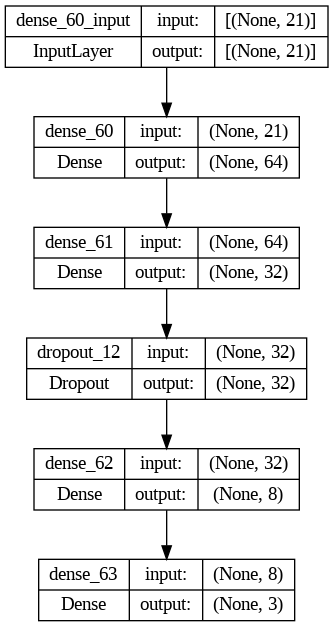

In [323]:
from tensorflow.keras.utils import plot_model
plot_model(classificator1D, show_shapes=True, show_layer_names=True)

In [324]:
# Entrenamos un número fijo de épocas
epochs = 20
batch_size = 32

history_classificator1D = classificator1D.fit(x=x_train,
                        y=y_train_multiclass_cat,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_valid, y_valid_multiclass_cat),
                        verbose=1)

Epoch 1/20
36/36 [==============================] - 2s 14ms/step - loss: 1.0407 - accuracy: 0.4522 - val_loss: 0.9533 - val_accuracy: 0.5850
Epoch 2/20
36/36 [==============================] - 0s 5ms/step - loss: 0.8438 - accuracy: 0.6576 - val_loss: 0.8319 - val_accuracy: 0.6190
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 0.7175 - accuracy: 0.7076 - val_loss: 0.7357 - val_accuracy: 0.7075
Epoch 4/20
36/36 [==============================] - 0s 5ms/step - loss: 0.6586 - accuracy: 0.7410 - val_loss: 0.6956 - val_accuracy: 0.7075
Epoch 5/20
36/36 [==============================] - 0s 4ms/step - loss: 0.6028 - accuracy: 0.7568 - val_loss: 0.6892 - val_accuracy: 0.7007
Epoch 6/20
36/36 [==============================] - 0s 5ms/step - loss: 0.5672 - accuracy: 0.7709 - val_loss: 0.7050 - val_accuracy: 0.7143
Epoch 7/20
36/36 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7770 - val_loss: 0.7063 - val_accuracy: 0.7075
Epoch 8/20
36/36 [=

In [325]:
classificator1D.evaluate(x_test, y_test_multiclass_cat, verbose=1)

5/5 [==============================] - 0s 4ms/step - loss: 0.6171 - accuracy: 0.7447


[0.6171406507492065, 0.7446808218955994]

In [326]:

#Representación de modelos
from tensorflow.keras.utils import plot_model

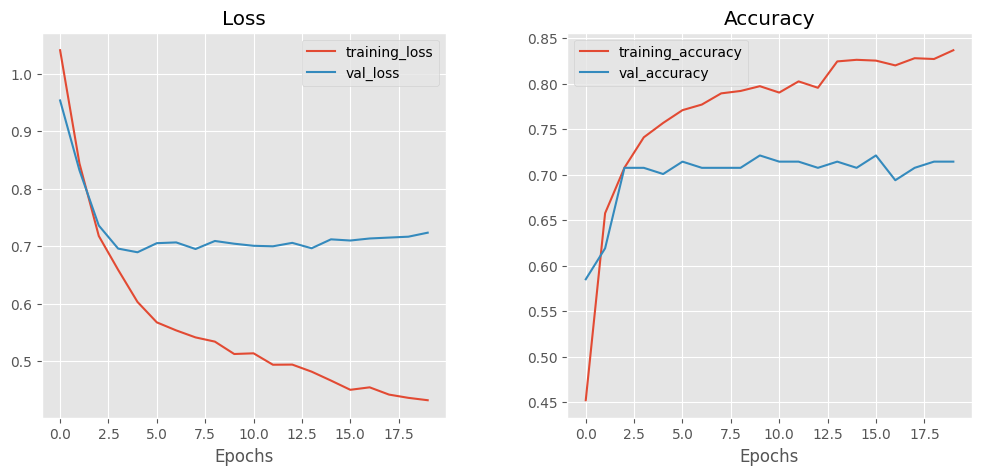

In [327]:
plot_loss_curves(history_classificator1D)

## 7. Modelo basado en imagenes

Red Neuronal Convolucional (CNN):
Una CNN es un tipo de arquitectura de red neuronal especialmente diseñada para procesar datos de imágenes.
Utiliza capas convolucionales para extraer características relevantes de las imágenes y capas de agrupación (pooling) para reducir la dimensionalidad.
Las capas convolucionales aplican filtros a pequeñas regiones de la imagen para detectar patrones como bordes, texturas y formas.
Las capas de agrupación reducen el tamaño de la representación de la imagen, manteniendo las características más importantes.
Las CNN son ampliamente utilizadas en tareas de clasificación de imágenes, detección de objetos y segmentación semántica.
Enfoque Funcional:
En lugar de construir una CNN de manera secuencial, podemos usar el enfoque funcional en Keras.
El enfoque funcional nos permite crear modelos más complejos con múltiples entradas o salidas.
Definimos las capas como funciones y luego las conectamos entre sí.
Creación del Modelo:
Crearemos una CNN con tres capas convolucionales: 16 filtros en la primera capa, 32 en la segunda y 64 en la tercera.
La primera capa debe recibir la dimensión de los datos de entrada (por ejemplo, el tamaño de la imagen).
Cambiaremos la última capa para adaptarla a nuestro problema específico (por ejemplo, clasificación de imágenes).

In [328]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input

# Tamaño de las imágenes
inputShape = (224, 224, 3)
chanDim = -1
# Filtros que vamos a aplicar en las capas convolucionales
filters=(16, 32, 64)
inputs = Input(shape=inputShape)
# Recorremos el bucle creando las diferentes capas
for (i, f) in enumerate(filters):
		# si es la primera capa indicamos el inputshape
  if i == 0:
	  x = inputs
	# CONV => BN => RELU => POOL
  x = Conv2D(f, (3, 3), padding="same")(x)
  x = BatchNormalization(axis=chanDim)(x)
  x = Activation("relu")(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)

# Aplanamos los datos y ponemos una capa densa de 16 neuronas con activación relu
x = Flatten()(x)
x = Dense(16)(x)
x = BatchNormalization(axis=chanDim)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
# Añadimos otra capa densa de 4 neuronas y activación relu
x = Dense(4)(x)
x = Activation("relu")(x)
# Añadimos la última capa con 3 neuronas y función softmax para la calsificación
x = Dense(3, activation="softmax")(x)
# Construimos la red neuronal
model_images = Model(inputs, x)

In [338]:
model_images.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history_model_images = model_images.fit(x=images_train, y=y_train_multiclass_cat,
                                        validation_data=(images_valid, y_valid_multiclass_cat),
                                        epochs=10, batch_size=32,
                                        callbacks=[LearningRateScheduler(lr_time_based_decay, verbose=1)])



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
36/36 [==============================] - 107s 3s/step - loss: 1.0857 - accuracy: 0.4513 - val_loss: 1.0460 - val_accuracy: 0.4830 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.000999999047498404.
Epoch 2/10
36/36 [==============================] - 93s 3s/step - loss: 1.0208 - accuracy: 0.4934 - val_loss: 1.2526 - val_accuracy: 0.3673 - lr: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.0009999969997655552.
Epoch 3/10
36/36 [==============================] - 96s 3s/step - loss: 0.9677 - accuracy: 0.5171 - val_loss: 1.4367 - val_accuracy: 0.3673 - lr: 1.0000e-03

Epoch 4: LearningRateScheduler setting learning rate to 0.0009999940207170218.
Epoch 4/10
36/36 [==============================] - 93s 3s/step - loss: 0.9428 - accuracy: 0.5549 - val_loss: 1.4582 - val_accuracy: 0.3673 - lr: 9.9999e-04

Epoch 5: LearningRateScheduler setting learning rate to

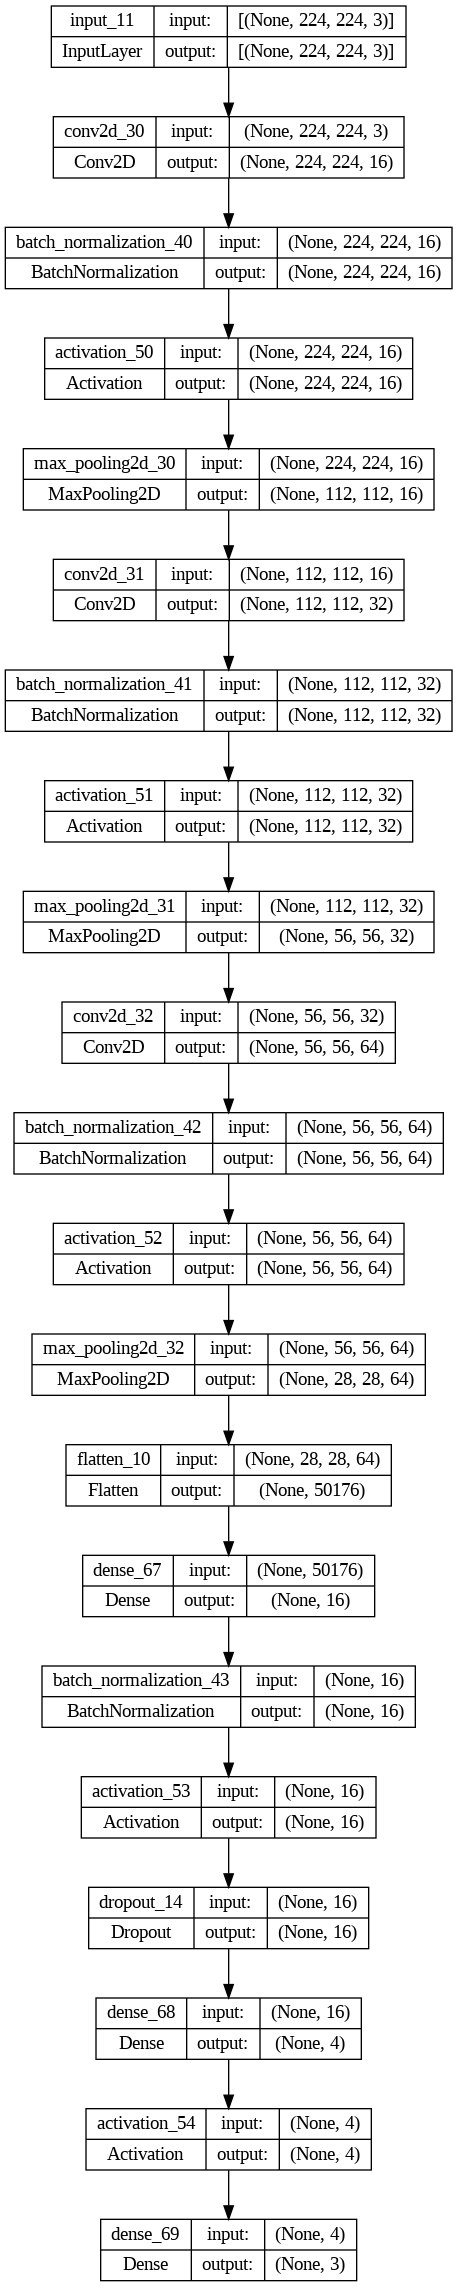

In [339]:
plot_model(model_images, show_shapes=True, show_layer_names=True)

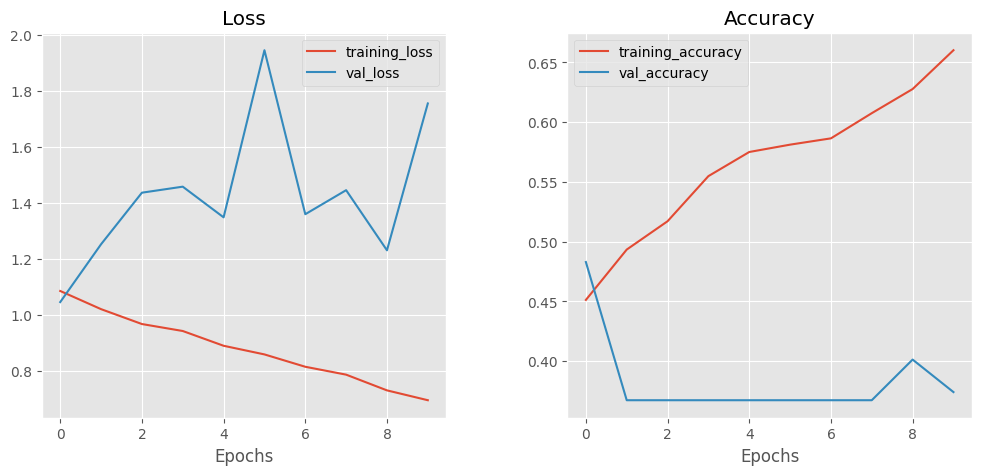

In [340]:
plot_loss_curves(history_model_images)

## 8. Modelo Mixto

Late Fusion

In [341]:
late_1D_train = classificator1D.predict(x_train)
late_1D_valid = classificator1D.predict(x_valid)
late_1D_test  = classificator1D.predict(x_test)

5/5 [==============================] - 0s 6ms/step


In [342]:
print(late_1D_train.shape)
print(late_1D_valid.shape)
print(late_1D_test.shape)

(1139, 3)
(147, 3)
(141, 3)


In [343]:
late_images_train = model_images.predict(images_train)
late_images_valid = model_images.predict(images_valid)
late_images_test  = model_images.predict(images_test)

5/5 [==============================] - 3s 580ms/step


In [344]:
print(late_images_train.shape)
print(late_images_valid.shape)
print(late_images_test.shape)

(1139, 3)
(147, 3)
(141, 3)


In [345]:
late_train_features = np.concatenate((late_1D_train, late_images_train), axis=1)
late_valid_features = np.concatenate((late_1D_valid, late_images_valid)  , axis=1)
late_test_features  = np.concatenate((late_1D_test,  late_images_test) , axis=1)

y_labels_train = np.concatenate((y_train_multiclass, y_valid_multiclass))
y_labels_test = y_test_multiclass

In [346]:

#Combinación tipos de datos
from sklearn.svm import SVC
late_fuser = SVC(random_state=123)
late_fuser.fit(X=np.concatenate((late_train_features, late_valid_features)),y=y_labels_train)
acc_late = late_fuser.score(X=late_test_features, y=y_labels_test)
print(f"Late fusion SVC {round(acc_late*100,2)} % accuracy")

Late fusion SVC 73.76 % accuracy
